In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Blank Image


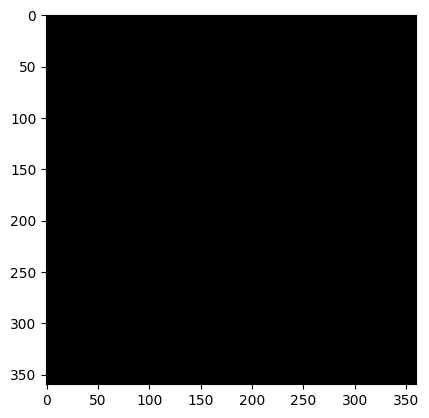

In [3]:
IMG_DIMS = (360,360)
CENTER = (IMG_DIMS[0]//2, IMG_DIMS[1]//2)
RADIUS = 160

WHITE = (255, 255, 255)

image = np.zeros(IMG_DIMS, dtype=np.uint8)

print("Blank Image")
plt.imshow(image, cmap='gray')

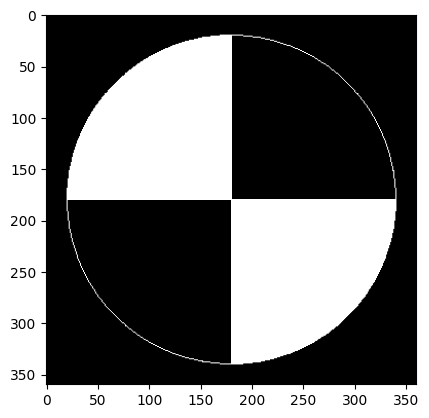

In [4]:
# Draw Quadrants.
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=0, endAngle=90, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=90, endAngle=180, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=180, endAngle=270, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=270, endAngle=360, color=WHITE)


# Draw lines to seperate quadrants.
image = cv2.line(image, (IMG_DIMS[0]//2 - 160, IMG_DIMS[1]//2), (IMG_DIMS[0]//2 + 160, IMG_DIMS[1]//2), color=WHITE)
image = cv2.line(image, (IMG_DIMS[0]//2, IMG_DIMS[1]//2 - RADIUS), (IMG_DIMS[0]//2, IMG_DIMS[1]//2 + RADIUS), color=WHITE)

# Fill in colors.
cv2.floodFill(image, None, (IMG_DIMS[0]//2 - 80, IMG_DIMS[1]//2 - RADIUS//2), 255)
cv2.floodFill(image, None, (IMG_DIMS[0]//2 + 80, IMG_DIMS[1]//2 + RADIUS//2), 255)
plt.imshow(image, cmap='gray')

Step 1 : Perform a gaussian blur on the image. 

Step 2 : Perform first and second derivate on the blurred image. 

Step 3 : Determine variance of edge and analyze. 

Source Image -> Gaussian blurred image (kernel : {}, sd : {}) 5 5 -> First derivative mask -> Second derivative mask


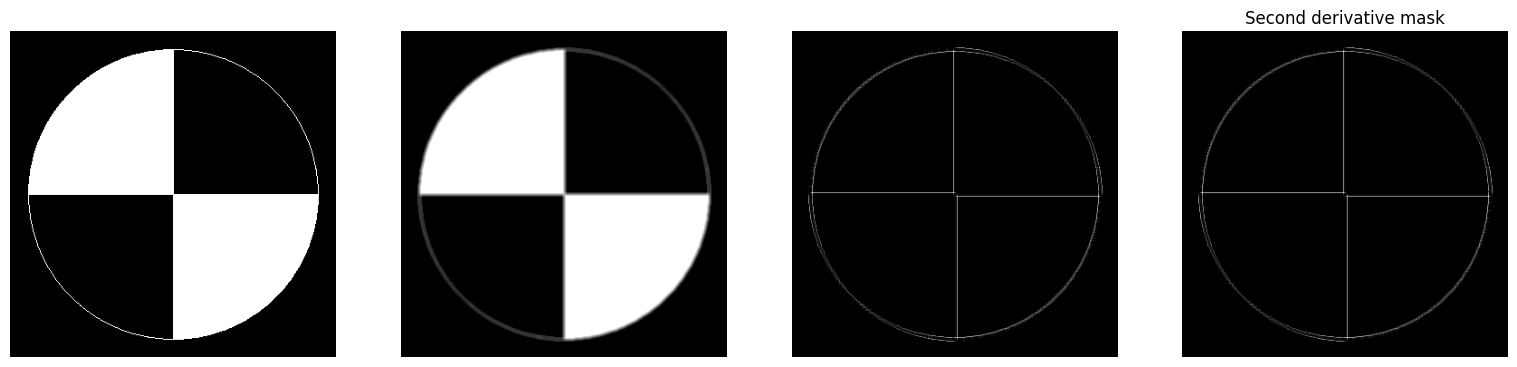

Histogram :: First Derivative


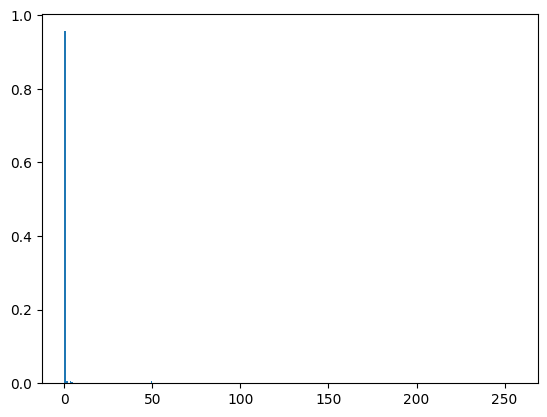

Variance:: 24.822541454951608

Histogram :: Second Derivative


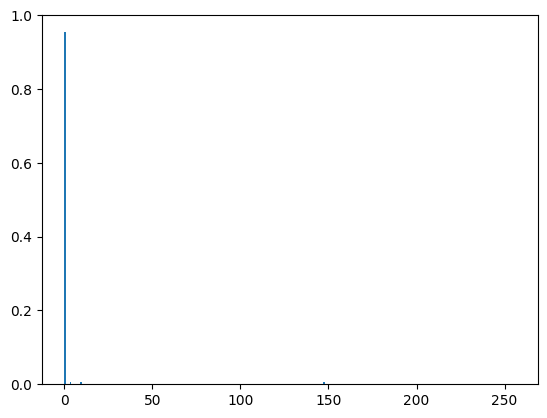

Variance:: 210.2321069920744

Source Image -> Gaussian blurred image (kernel : {}, sd : {}) 7 10 -> First derivative mask -> Second derivative mask


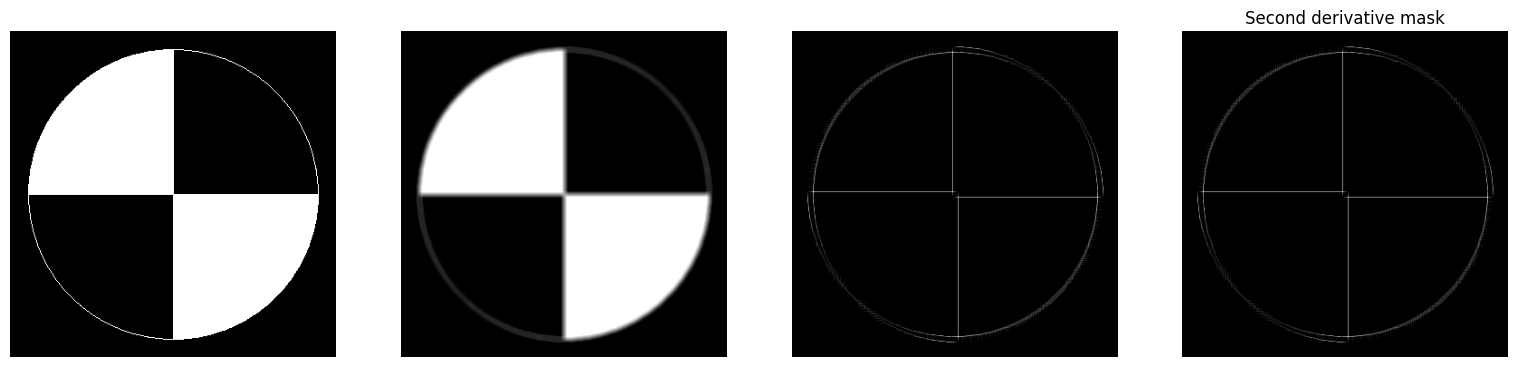

Histogram :: First Derivative


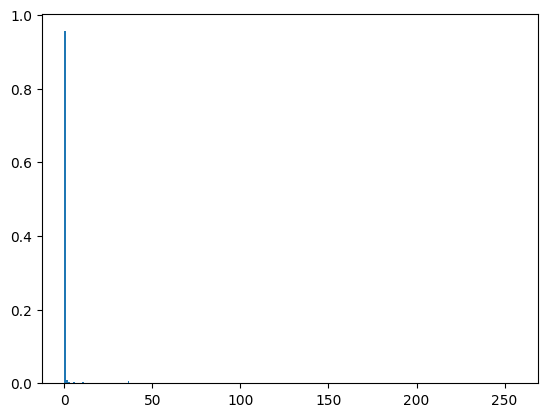

Variance:: 11.633094133659121

Histogram :: Second Derivative


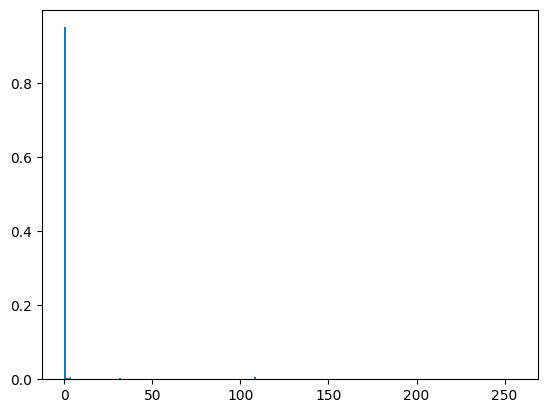

Variance:: 100.46495365012004

Source Image -> Gaussian blurred image (kernel : {}, sd : {}) 13 15 -> First derivative mask -> Second derivative mask


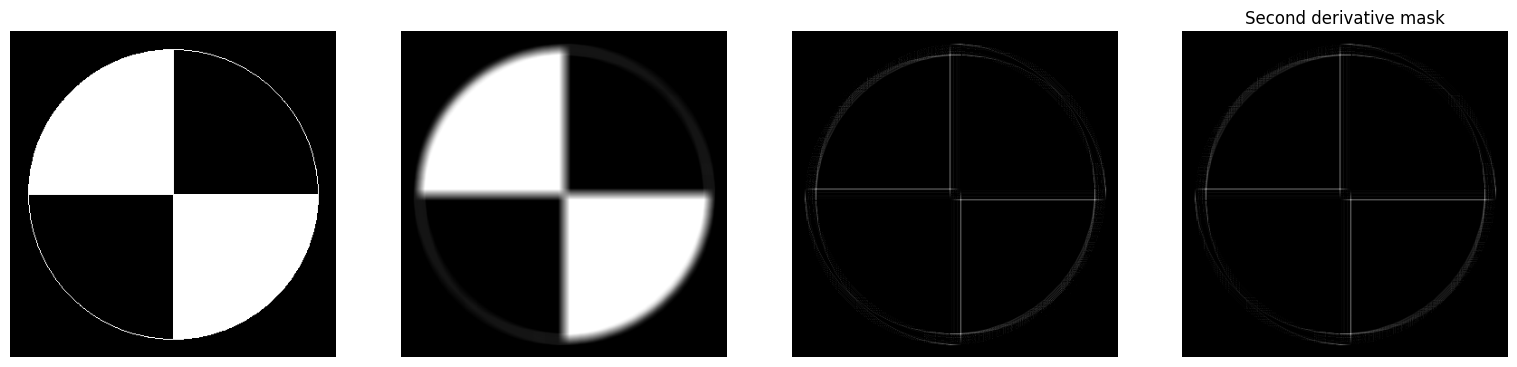

Histogram :: First Derivative


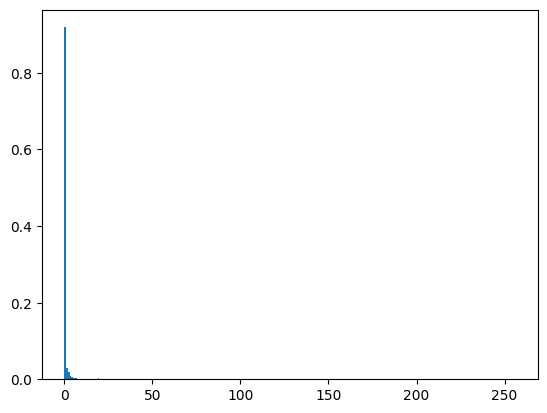

Variance:: 2.7040951357929432

Histogram :: Second Derivative


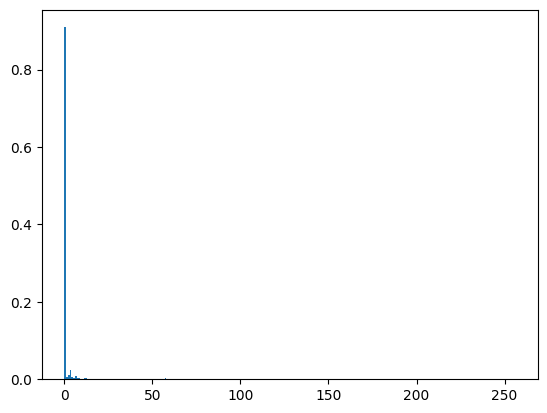

Variance:: 23.397339915552124

Source Image -> Gaussian blurred image (kernel : {}, sd : {}) 17 17 -> First derivative mask -> Second derivative mask


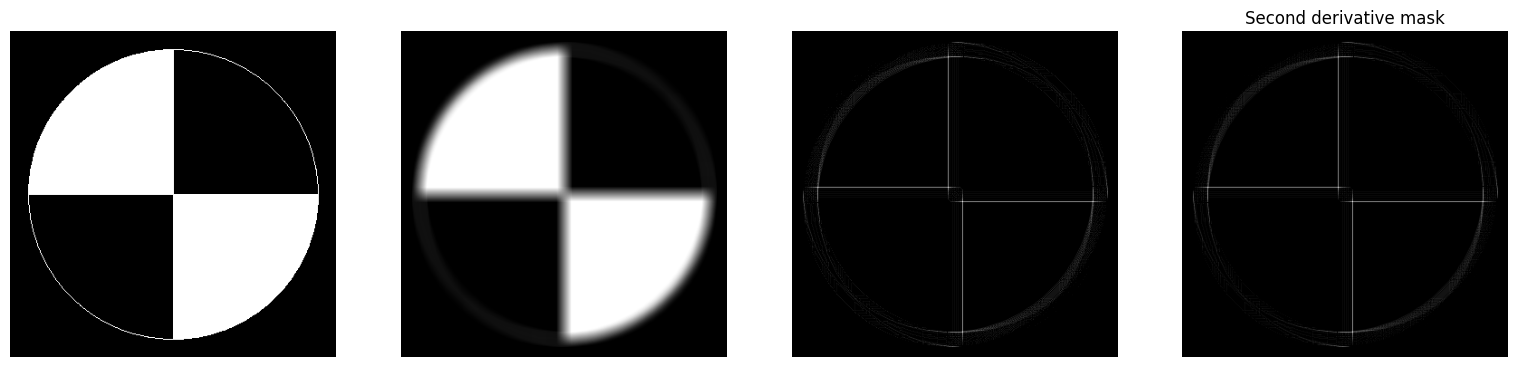

Histogram :: First Derivative


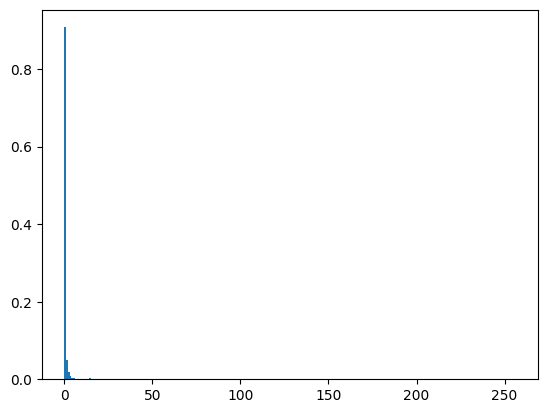

Variance:: 1.412824301745161

Histogram :: Second Derivative


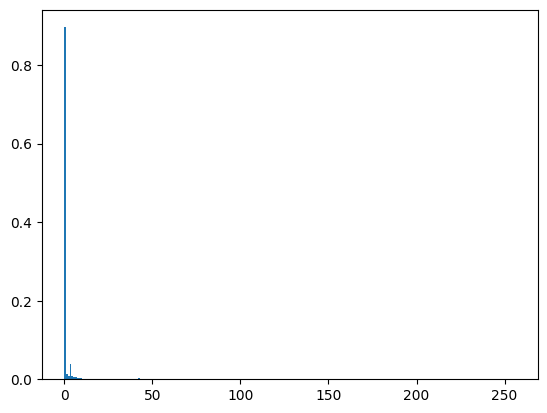

Variance:: 12.015606241188458

Source Image -> Gaussian blurred image (kernel : {}, sd : {}) 23 20 -> First derivative mask -> Second derivative mask


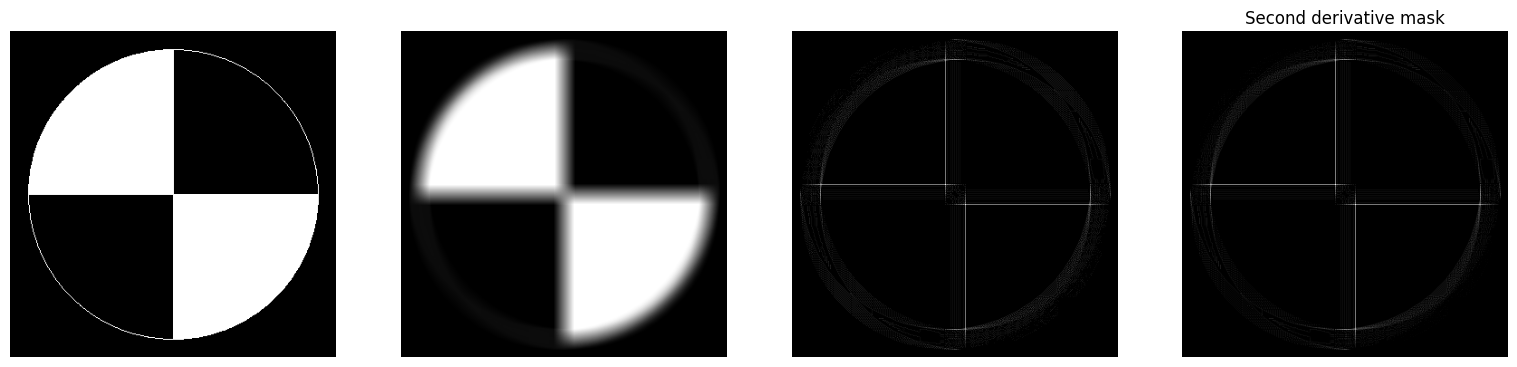

Histogram :: First Derivative


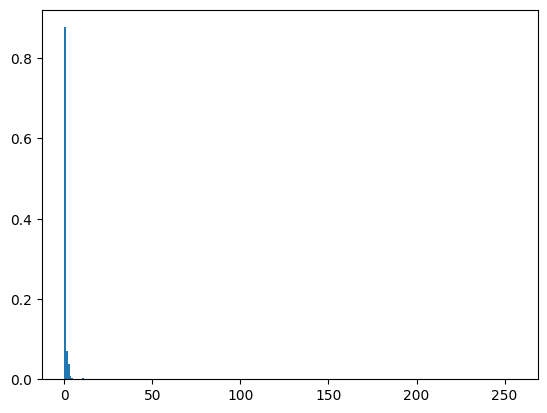

Variance:: 0.8111923715896966

Histogram :: Second Derivative


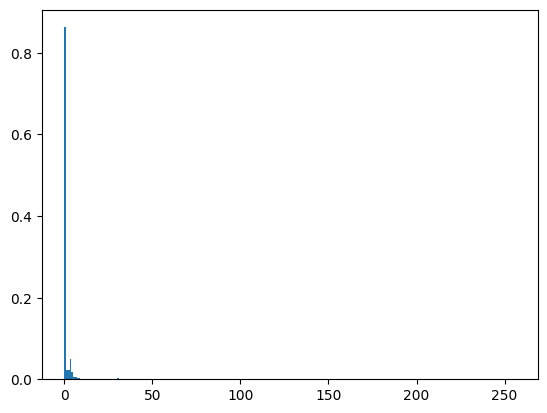

Variance:: 6.231401171458238



In [24]:
k_sizes = [5, 7, 13, 17, 23]
standard_deviations = [5, 10, 15, 17, 20]

for i in range(len(k_sizes)):
    blurred_image = cv2.GaussianBlur(image, (k_sizes[i], k_sizes[i]), standard_deviations[i])

    first_derivative_filter = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    second_derivative_filter = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

    first_derivative_mask = abs(cv2.filter2D(blurred_image, -1, first_derivative_filter))
    second_derivative_mask = abs(cv2.filter2D(blurred_image, -1, second_derivative_filter))

    plt.figure(figsize=(100,20))
    print('Source Image', '->', 'Gaussian blurred image (kernel : {}, sd : {})', k_sizes[i], standard_deviations[i], '->', 'First derivative mask', '->', 'Second derivative mask')

    plt.subplot(4,20, 1)
    plt.imshow(image,cmap='gray')
    plt.axis('off')

    plt.subplot(4,20, 2)
    plt.imshow(blurred_image,cmap='gray')
    plt.axis('off')

    plt.subplot(4,20, 3)
    plt.imshow(first_derivative_mask,cmap='gray')
    plt.axis('off')

    plt.subplot(4,20, 4)
    plt.imshow(second_derivative_mask,cmap='gray')
    plt.title(('Second derivative mask'))
    plt.axis('off')

    plt.show()

    print('Histogram :: First Derivative')
    plt.hist(first_derivative_mask.ravel(),256,[0,256], density=True)
    plt.show()
    print('Variance::', first_derivative_mask.var())
    print()

    plt.show()

    print('Histogram :: Second Derivative')
    plt.hist(second_derivative_mask.ravel(),256,[0,256], density=True)
    plt.show()
    print('Variance::', second_derivative_mask.var())
    print()

    plt.show()

